# Time Series Decomposition
Feb 21st 2021

In [2]:
import sys
print(sys.executable)
import numpy as np
import pandas as pd
import os
print(os.getcwd())
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
from IPython.display import display
from statsmodels.tsa.seasonal import seasonal_decompose
# Config:
pd.options.display.float_format = '{:,.2f}'.format
plotsize = (13, 5)
sns.set_context("paper", font_scale= 1.5)
plt.rcParams['axes.spines.right']= False
plt.rcParams['axes.spines.top']= False
plt.rcParams['figure.figsize']= plotsize
SEED=10

/home/razielar/miniconda3/envs/time-series/bin/python
/home/razielar/Documents/git_rep/Machine_learning/time_series_forecasting/coursera_time_series/week_1/2_time_series_decomposition


## Input data

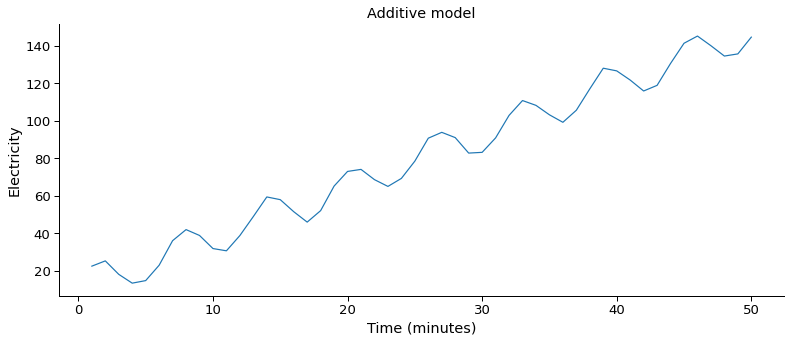

In [5]:
time= np.arange(1,51)
trend= time * 2.75
seasonal= 10+np.sin(time)*10
np.random.seed(SEED)
residual= np.random.normal(loc= 0.0, scale= 1, size= len(time)) #mean= 0, and sd= 1

# Additive model:
additive= trend + seasonal + residual

# Plot:
plt.plot(time, additive)
plt.title('Additive model')
plt.xlabel('Time (minutes)')
plt.ylabel('Electricity')
plt.show()

In [10]:
ss_decomposition= seasonal_decompose(x= additive, model= "additive", period= 6)
estimated_trend= ss_decomposition.trend
estimated_seasonal= ss_decomposition.seasonal
estimated_residual= ss_decomposition.resid